In [91]:
import matplotlib.pyplot as plt
import numpy as np
import herringbone as hb


plt.rcParams['font.family'] = 'DejaVu Serif'

## 1. Plots for introduction

## 4. Monte Carlo Algorithms

### 4.1. Prediction

To analyse the prediction task of monte carlo we use the map from example 4.1. of the book. It has a terminal state in the top left and bottom right corner, a gamma of 1, and a reward of -1 for each state.

In [92]:
state_path = "herringbone/env_core/config/state_config.json"
map_path = f"herringbone/env_core/maps/slides.csv"
action_path = "herringbone/env_core/config/action_config.json"

gamma = 1

demo_mdp = hb.MDP(state_path, map_path, action_path, seed=42, gamma=gamma)

In [93]:
"""Ground truth based on example 4.1. from Andrew Barto en Richard S. Sutton's Reinforcement Learning: An Introduction"""

states = demo_mdp.get_states()
values = [0.0, -14, -20, -22, -14, -18, -20, -20, -20, -20, -18, -14, -22, -20, -14, 0.0]
exact_value_function = dict(zip(states, values))

hb.Render.preview_V(demo_mdp, exact_value_function)


╔════════╦════════╦════════╦════════╗
║  0.00  ║ -14.00 ║ -20.00 ║ -22.00 ║
╠════════╬════════╬════════╬════════╣
║ -14.00 ║ -18.00 ║ -20.00 ║ -20.00 ║
╠════════╬════════╬════════╬════════╣
║ -20.00 ║ -20.00 ║ -18.00 ║ -14.00 ║
╠════════╬════════╬════════╬════════╣
║ -22.00 ║ -20.00 ║ -14.00 ║  0.00  ║
╚════════╩════════╩════════╩════════╝


In [94]:
random_policy = hb.Policy(mdp=demo_mdp)
episode = hb.Episode(mdp=demo_mdp, policy=random_policy, max_depth=1000)
episode.peek()

╔═══════╦═══════╦═══════╦═══════╗
║   -1  ║   -1  ║   -1  ║   -1  ║
╠═══════╬═══════╬═══════╬═══════╣
║   -1  ║   -1  ║   -1  ║   -1  ║
╠═══════╬═══════╬═══════╬═══════╣
║   -1  ║   -1  ║   -1  ║   -1  ║
╠═══════╬═══════╬═══════╬═══════╣
║   -1  ║   -1  ║   -1  ║   -1  ║
╚═══════╩═══════╩═══════╩═══════╝[0]


As a metric the root mean squared error is used, over all V(s).

In [95]:
def calc_state_value_rms(truth, predicted):
    y, y_pred = np.array(list(truth.values())), np.array(list(predicted.values()))
    return np.sqrt(np.mean((y - y_pred) ** 2))

The monte carlo predictor estimates the value function, while saving snapshots in between.

In [ ]:
steps = 100000
step_size = 1
rms_over_time = []
mc_predictor = hb.MonteCarloPredictor(demo_mdp)
for i in range(steps):
    mc_predictor.evaluate_policy(policy=random_policy,n_samples=step_size)
    rms_over_time.append(calc_state_value_rms(exact_value_function, mc_predictor.value_functions))
    
# Estimated time: less than 20 seconds.
  

Our predicted estimated values are very close to our ground truth:

In [97]:
hb.Render.preview_V(demo_mdp, mc_predictor.value_functions)

╔════════╦════════╦════════╦════════╗
║  0.00  ║ -13.86 ║ -19.94 ║ -21.96 ║
╠════════╬════════╬════════╬════════╣
║ -13.90 ║ -17.93 ║ -19.92 ║ -19.95 ║
╠════════╬════════╬════════╬════════╣
║ -20.00 ║ -19.96 ║ -17.95 ║ -14.01 ║
╠════════╬════════╬════════╬════════╣
║ -21.93 ║ -19.92 ║ -14.02 ║  0.00  ║
╚════════╩════════╩════════╩════════╝


The snapshots are plotted at two different scales, to show that the monte carlo algortihm slowly converges to the actual value functions under the policy.

In [98]:
def plot_v_rms(rms, stop1, stop2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

    # Zoomed in plot
    axes[0].plot(range(len(rms[:stop1])), rms[:stop1], linestyle='-', color="red", label="Zoomed-in View")
    axes[0].set_title(f'First {stop1} steps')
    axes[0].set_xlabel(f'Episodes')
    axes[0].set_ylabel('RMS')
    axes[0].grid(True)
    axes[0].legend()

    # Full scale plot
    axes[1].plot(range(len(rms[:stop2])), rms[:stop2], linestyle='-', color="blue", label="Larger Scale View")
    axes[1].set_title(f'First {stop2} steps')
    axes[1].set_xlabel(f'Episodes')
    axes[1].set_ylabel('RMS')
    axes[1].grid(True)
    axes[1].legend()

    fig.suptitle('First Visit Monte Carlo Prediction', fontsize=14)

    fig.text(0.5, 0.92, 'Comparison of RMS over $v_{\\pi}(s)$ for all $s \\in S$', 
         fontsize=12, ha='center')
    plt.tight_layout()  
    plt.show()

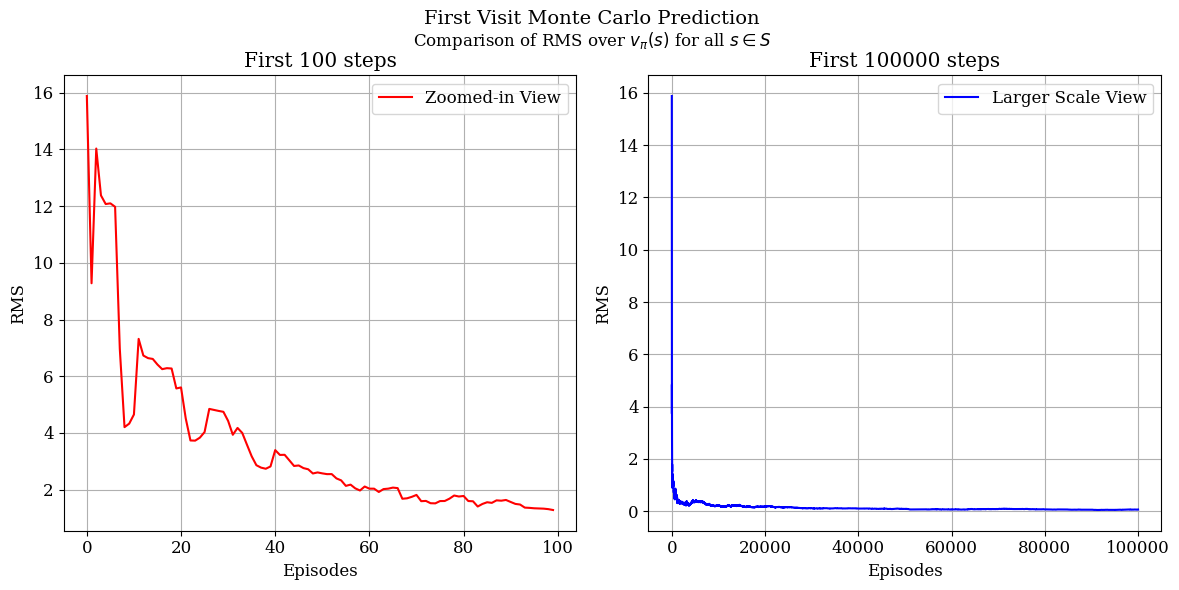

In [99]:
plot_v_rms(rms_over_time, 100, 100000)